In [1]:
from Bio.Seq import Seq
from Bio.Data import IUPACData 

In [2]:
# Database : NCBI                                                         
# If we dont import fasta file                 
# Sequencial part of Zygaena transalpina       
zygaena_transalpina='''
1 tttttatttt tagaatttta ttaatttgtt tataaattaa aaattatttt aaaattaaat
61 aatttttata aaatatacta ttttgacaga taaatgtgat ggttttagaa atcatttata
121 tataatttaa ttatgtaaat agtaaatgat tttaaaagat tatttaatat tttttattgg
181 gattttattt ttaattttag gagttttaat tggagtggca tttttaactt tattagaacg
241 taaagtttta ggttatattc aaattcgtaa ggggcctaat aaagtaggaa ttatagggat
301 tttacagcca ttttctgatg ctattaagtt atttacaaag gaacaaactt atcctttatt
361 ttctaattat gtgtcatatt atttttcacc aattattaga tttattttat ctttaataat
421 ttgattatta attccttatt attttaatat aattagattt aatttaggaa taat
'''

def SeqToString(s):
    ret=[x for x in s.split() if not x.isdigit()]
    return ''.join(ret).upper()

ret=SeqToString(zygaena_transalpina)
#ret

In [3]:
seq=Seq(ret)
seq_complement=seq.complement()

In [4]:
print(seq+'\n')
print(seq_complement)

TTTTTATTTTTAGAATTTTATTAATTTGTTTATAAATTAAAAATTATTTTAAAATTAAATAATTTTTATAAAATATACTATTTTGACAGATAAATGTGATGGTTTTAGAAATCATTTATATATAATTTAATTATGTAAATAGTAAATGATTTTAAAAGATTATTTAATATTTTTTATTGGGATTTTATTTTTAATTTTAGGAGTTTTAATTGGAGTGGCATTTTTAACTTTATTAGAACGTAAAGTTTTAGGTTATATTCAAATTCGTAAGGGGCCTAATAAAGTAGGAATTATAGGGATTTTACAGCCATTTTCTGATGCTATTAAGTTATTTACAAAGGAACAAACTTATCCTTTATTTTCTAATTATGTGTCATATTATTTTTCACCAATTATTAGATTTATTTTATCTTTAATAATTTGATTATTAATTCCTTATTATTTTAATATAATTAGATTTAATTTAGGAATAAT

AAAAATAAAAATCTTAAAATAATTAAACAAATATTTAATTTTTAATAAAATTTTAATTTATTAAAAATATTTTATATGATAAAACTGTCTATTTACACTACCAAAATCTTTAGTAAATATATATTAAATTAATACATTTATCATTTACTAAAATTTTCTAATAAATTATAAAAAATAACCCTAAAATAAAAATTAAAATCCTCAAAATTAACCTCACCGTAAAAATTGAAATAATCTTGCATTTCAAAATCCAATATAAGTTTAAGCATTCCCCGGATTATTTCATCCTTAATATCCCTAAAATGTCGGTAAAAGACTACGATAATTCAATAAATGTTTCCTTGTTTGAATAGGAAATAAAAGATTAATACACAGTATAATAAAAAGTGGTTAATAATCTAAATAAAATAGAAATTATTAAACTAATAATTAAGGAATAATAAAATTATATTAATCTAAATTAAATCCTTATTA


In [5]:
# T -> U
rna=seq.transcribe()
print(rna)

UUUUUAUUUUUAGAAUUUUAUUAAUUUGUUUAUAAAUUAAAAAUUAUUUUAAAAUUAAAUAAUUUUUAUAAAAUAUACUAUUUUGACAGAUAAAUGUGAUGGUUUUAGAAAUCAUUUAUAUAUAAUUUAAUUAUGUAAAUAGUAAAUGAUUUUAAAAGAUUAUUUAAUAUUUUUUAUUGGGAUUUUAUUUUUAAUUUUAGGAGUUUUAAUUGGAGUGGCAUUUUUAACUUUAUUAGAACGUAAAGUUUUAGGUUAUAUUCAAAUUCGUAAGGGGCCUAAUAAAGUAGGAAUUAUAGGGAUUUUACAGCCAUUUUCUGAUGCUAUUAAGUUAUUUACAAAGGAACAAACUUAUCCUUUAUUUUCUAAUUAUGUGUCAUAUUAUUUUUCACCAAUUAUUAGAUUUAUUUUAUCUUUAAUAAUUUGAUUAUUAAUUCCUUAUUAUUUUAAUAUAAUUAGAUUUAAUUUAGGAAUAAU


In [6]:
# Getting protein
# DNA -> mRNA -> AA
protein=rna.translate()
print(protein)

FLFLEFY*FVYKLKIILKLNNFYKIYYFDR*M*WF*KSFIYNLIM*IVNDFKRLFNIFYWDFIFNFRSFNWSGIFNFIRT*SFRLYSNS*GA**SRNYRDFTAIF*CY*VIYKGTNLSFIF*LCVILFFTNY*IYFIFNNLIINSLLF*YN*I*FRNN


In [7]:
# Graphic
import matplotlib.pyplot as plt

In [8]:
def create_dict(p):
    ret={}
    p=str(p).replace('*','')
    for x in IUPACData.protein_letters:
        ret[x]=0
        
    for x in p:
        ret[x]+=1
    
    return ret,len(str(p))

In [9]:
protein_dict,total=create_dict(protein)

In [10]:
def split_to_list(d):
    names=[k for k,v in d.items()]
    values=[v for k,v in d.items()]
    return names,values

<BarContainer object of 20 artists>

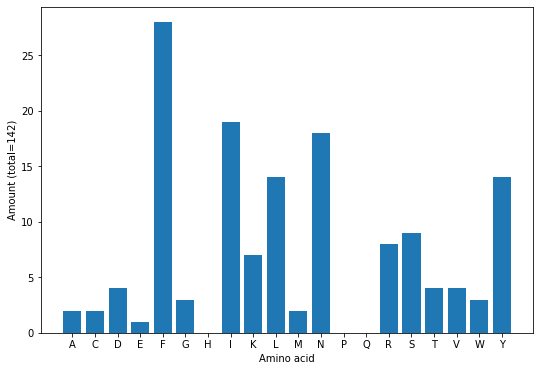

In [11]:
plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.ylabel('Amount (total={})'.format(total))
plt.xlabel('Amino acid')
names,values=split_to_list(protein_dict)
plt.bar(names, values)

In [12]:
# SARS-CoV-2 (6X2A)
from Bio.PDB import *
import nglview as nv

In [13]:
# pdbl = PDBList()
# pdbl.retrieve_pdb_file('6X2A')

In [14]:
#Parsing the file
struct=MMCIFParser().get_structure('6X2A', 'proteins/6x2a.cif')
# Graphic env
view=nv.show_biopython(struct)
view.clear_representations() 
view.add_ball_and_stick()
view

NGLWidget()

In [15]:
# Import fasta file
from Bio import SeqIO
# Proteins

In [16]:
record = SeqIO.read("proteins/rcsb_pdb_6X2A.fasta", "fasta")
record.description

'6X2A_1|Chains A,B,C|Spike glycoprotein|Severe acute respiratory syndrome coronavirus 2 (2697049)'

In [17]:
print(record.seq)

VNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDILDITDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNEVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPGSASSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKYIGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGRLQSLQTYVTQQLIRA